      Use the
        Iris, apply decision tree classifier and complete the following tasks
        
        1-      Feature and
        Label separation


        2-      Model training
        of training data set


        3-      Model
        prediction of set data set


        4-      Plotting the
        tree at large


        5-      Identify
        outliers using a box plot


        6-      Calculate the
        Entropy


        7-      Calculate Gini
        Formula

In [29]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,OneHotEncoder ,MinMaxScaler ,StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score ,f1_score
import seaborn as sns
import joblib

In [5]:
data = pd.read_csv("../DataSets/iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
## check and Clean it
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.duplicated().sum()

3

In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
x = data.drop("species",axis=1)
y = data.species

pipeline = Pipeline([("classifier",DecisionTreeClassifier())])

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y, test_size=0.2 ,random_state = 42)

pipeline.fit(x_train , y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [17]:
pipeline.score(x_test ,y_test)

1.0

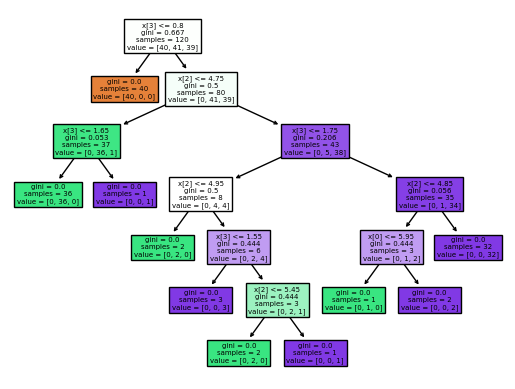

In [25]:
plot_tree(pipeline["classifier"],filled=True);

In [27]:
sepal_len = float(input("sepal_len: "))
sepal_width = float(input("sepal_width: "))
petal_len = float(input("petal_len: "))
petal_width = float(input("petal_width: "))
input_test = pd.DataFrame({"sepal_length": [sepal_len],
"sepal_width": [sepal_width],
"petal_length": [petal_len],
"petal_width": [petal_width]})

print(input_test)
y_input_predicted = pipeline.predict(input_test)
print("The flower is = ",y_input_predicted)

sepal_len: 1
sepal_width: 1
petal_len: 1
petal_width: 1
   sepal_length  sepal_width  petal_length  petal_width
0           1.0          1.0           1.0          1.0
The flower is =  ['versicolor']


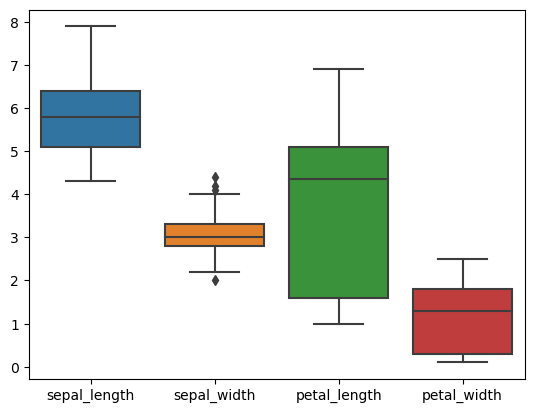

In [30]:
## Outliers using boxplot

sns.boxplot(data=data);

## sepal width has some outliers

In [36]:
## Gini index

import math

total = len(y)
class_counts = y.value_counts()
print(class_counts)
entropy = 0.0
for i in class_counts:
        print(i)
        probability = i / total
        entropy -= probability * math.log2(probability)
print('Entropy:', entropy)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
50
50
50
Entropy: 1.584962500721156


In [37]:
## gini index

import numpy as np
def gini_index(labels):
        classes, count = np.unique(labels, return_counts=True)
        prob = count / len(labels)
        gini = 1 - np.sum(prob ** 2)
        return gini

gini = gini_index(y)
print("Gini Index:", gini)

Gini Index: 0.6666666666666667
